<a href="https://colab.research.google.com/github/mhieu2001/Titanic-Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# **2.LOADING THE DATA**



In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload ()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Variable Notes**

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
#Working on the train before go to the test
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#DropPassengerID
train_df.set_index(train_df.PassengerId,inplace=True)

In [ ]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [ ]:
#train_df=pd.read_csv(train.csv, index_col='PassengerId')

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.1 Categorical vs Numerical
- Determine appropriate visualization and assumption.

**Which features are categorical**

- Nominal,Ordinal,Ratio,Interval

- Classify sample into similar ones

**Which features are numerical**

- Discrete, Continuous, Timeseries

- Values change

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB




- Categorical: Survived,Sex,Embarked.Pclass(ordinal)SibSp,Parch
    - Embarked: Port of Embarktion: C=Cherboug, Q=Queentowns, S=Southampton




- Numerical(continuous)Age,Fare(Discrete)
- Mix type: Ticket, Cabin
- Contain Possible Error/Typo: Name
- Blank/Null: Cabin>Age>Embarked
- Varous Data type: Str,Int,Float

According to the data dictionary, we know that the survived encode with 0/1

In [ ]:
train_df['Survived']=train_df['Survived'].astype('category')

In [ ]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [ ]:
features=['Pclass','Sex','SibSp','Parch','Embarked']
def convert_cat(df,features):
  for feature in features:
    df[feature]=df[feature].astype('category')
convert_cat(train_df,features)
convert_cat(test_df,features)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [ ]:
#Distribution of numerical feature across the sample
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200




*   count: the number of variables

*   mean: mean of all variables

*   std: Standard deviation
*   max: maximum values

*   25/50/75: Quartile - the number that range of % value fall below


In [ ]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644




*   Count: The number of values

*   Unique: The Number of categories
*   Top: The most common categories


*   Freq: Count of most common categories



# **3. EDA - Exploratory Data Analysis**
**Correlating categorical features**
- Survived, Sex, Embarked, Pclass,SibSp,Parch

**Target Variable: Survived**

In [ ]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [ ]:
train_df['Survived'].value_counts(normalize=True).to_frame()
#Only 38% Survived passenger - imbalance data set but not so severe.

,Survived
0,0.616162
1,0.383838


In [ ]:
#Sex
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [ ]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

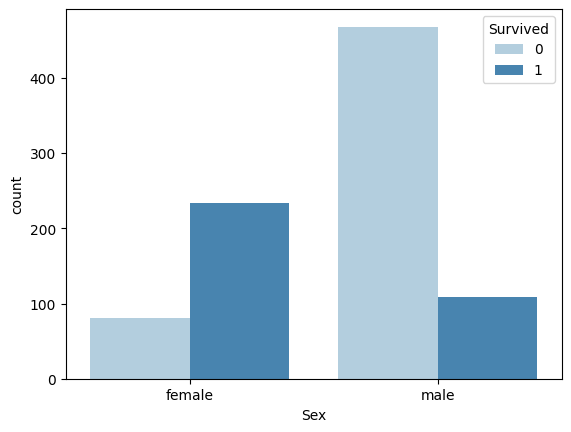

In [ ]:
#Graph the survived passenger based on sex
sns.countplot(data=train_df,x='Sex',hue='Survived', palette='Blues')

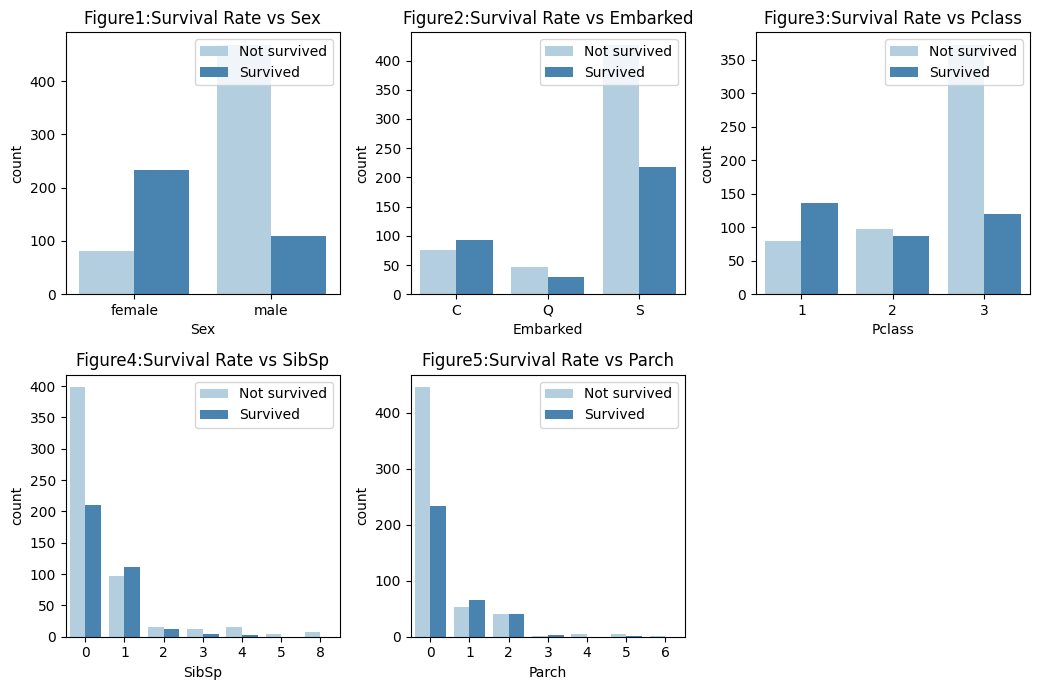

In [ ]:
#Multi-graphing in remaining categorical feature columns
cols=['Sex','Embarked','Pclass','SibSp','Parch']

n_rows=2
n_cols=3

fig,ax =plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols+c
    if i < len(cols):
      ax_i=ax[r,c]
      sns.countplot(data=train_df,x=cols[i],hue='Survived',palette='Blues',ax=ax_i)
      ax_i.set_title(f'Figure{i+1}:Survival Rate vs {cols[i]}')
      ax_i.legend(title='',loc='upper right',labels=['Not survived','Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

#Observation
**Survival Rate**
- Sex: The female percentage of survival higher compare to male

- Embarked: Most of people embarked on Southampton, and this is also the highest death rate.

- Class: First class has priority

- SibSp: The best chance to survive is have atleast 1-2 family member. Unless, the high death rate.

- Perch: 0 Parch is the most not survived

# **3.2 EDA for Numerical Features**

Numerical Features: Age,Fare

<Axes: xlabel='Age', ylabel='Count'>

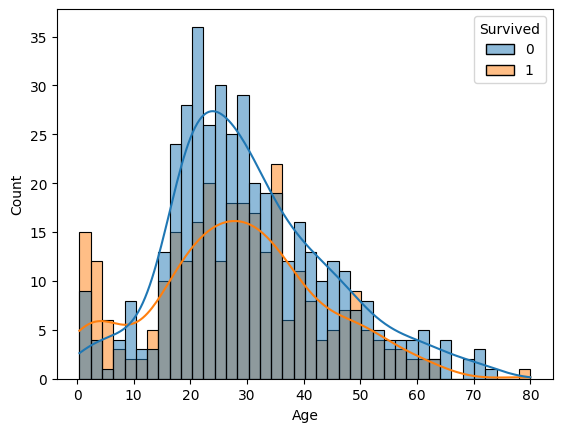

In [ ]:
#Age
sns.histplot(data=train_df, x='Age',hue='Survived', bins=40,kde=True)


- Majority passengers were from 18-40 ages

- Chilren had more chance to survive than other ages

In [ ]:
#Fare
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

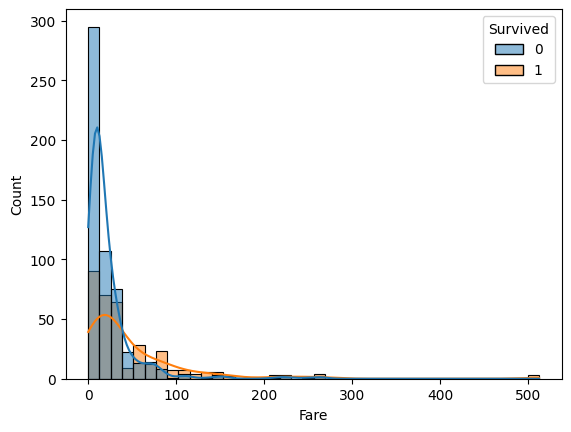

In [ ]:
sns.histplot(data=train_df, x='Fare',hue='Survived', bins=40,kde=True)

The data is right skewed graph, and unstable -> We divide the data into quartile to analysis

- Distribution of Fare
  - Fare does not follow a normal distribution and has a huge spike at the price range 0-100$

  - The distribution is skewed to the left with 75usd of the fare paid under 31 usd and a max paid fare of 512usd

- Quartile plot
  - Passenger with Luxury and Expensive Fare will have more chance to survive



<Axes: xlabel='Fare', ylabel='count'>

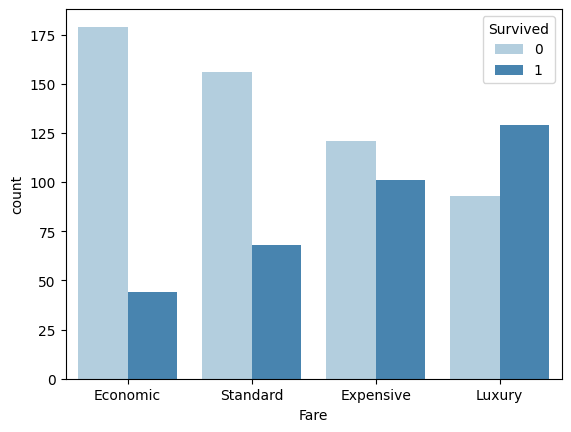

In [ ]:
fare_categories=['Economic','Standard','Expensive','Luxury']
quartile_data=pd.qcut(train_df['Fare'],4,labels=fare_categories)

sns.countplot(x=quartile_data,hue=train_df['Survived'],palette='Blues')

# **4. Feature Engineering and Data Wraggling**

- **Feature engineering** is ***the process of creating new features or modifying existing ones in a dataset to improve the performance of a machine learning model***. The goal is to select and transform features in a way that makes the algorithm perform better. This involves understanding the data, extracting relevant information, and creating new variables that can capture important patterns.
- **Data wrangling** is ***the process of cleaning, structuring, and organizing raw data into a format suitable for analysis***. It involves handling missing data, dealing with outliers, transforming variables, and merging datasets. The goal of data wrangling is to prepare the data in a way that makes it easier to work with and enhances the quality of the analysis.

### 4.1 Feature Engineering
##Name
- Regular Expression (Regex): Basically, there are easy to see the first name will follow by the "Mr,Mrs or Miss". This can be use to extract the feature group. We can utilize the regex 101.com to handle. However, in the Python general anh this project in particular, we will use the function.

In [ ]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
import re #regex
def extract_title(name):
  #p=re.compile(r",(.+)\.") #raw string with regex compile from regex 101
  p= re.compile(r",([\w\s]+)\.") #fix regex command
  return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply (lambda name: extract_title(name))


In [ ]:
#train_df['Title'].value_counts() #There is a mistake drop in Mrs. Martin. Let's check why

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [ ]:
#train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [ ]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

We can see from Master title below, the frequency are less often, I will group them into one for further convenience

In [ ]:
def group_title(title):
  if title in ['Mr','Mrs','Miss','Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

train_df['Title'] = train_df['Title'].apply (lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply (lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

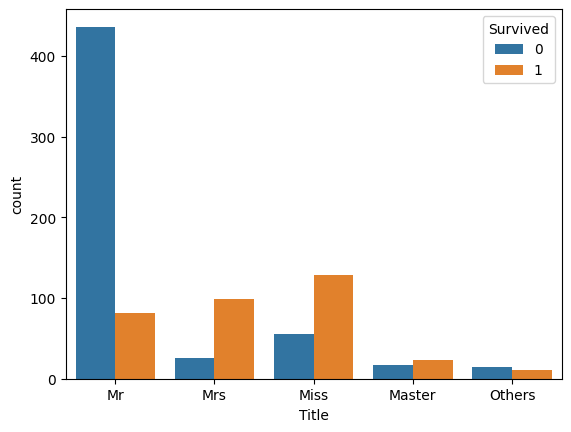

In [ ]:
sns.countplot(data=train_df,x='Title',hue='Survived')

##**Family**
- SibSp,Parch: The original form of data is category so we need to convert the type into integer to be combined together.

In [ ]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

<Axes: xlabel='Family_Size', ylabel='count'>

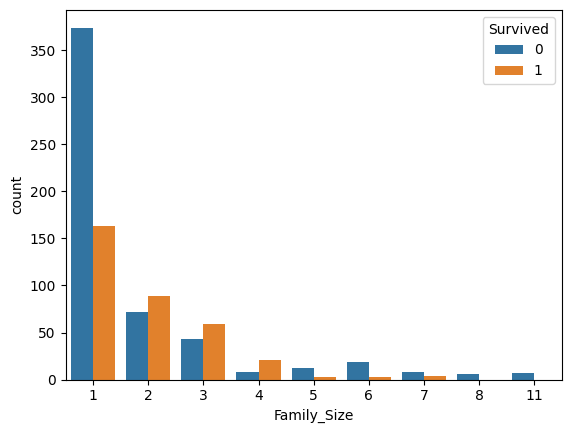

In [ ]:
sns.countplot(data=train_df,x='Family_Size',hue='Survived')

Survived rate peak at solo passengers and reduce significantly from 2 to and more. We should categorize into smaller groups for better further analysis.

In [ ]:
train_df['Family_Category']=pd.cut(train_df['Family_Size'],bins=[0,1,4,6,15],labels=['Solo','Small','Medium','Large'])
test_df['Family_Category']=pd.cut(test_df['Family_Size'],bins=[0,1,4,6,15],labels=['Solo','Small','Medium','Large'])


<Axes: xlabel='Family_Category', ylabel='count'>

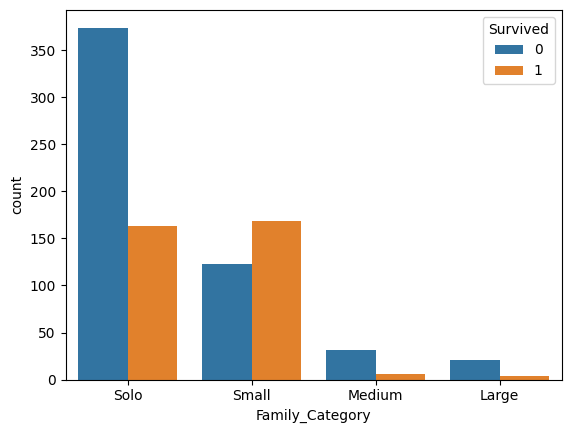

In [ ]:
sns.countplot(data=train_df,x='Family_Category',hue='Survived')

## **4.2 Data Wrangling**

In [ ]:
num_features=['Age','Fare']
cat_features=['Sex','Pclass','Embarked','Title','Family_Category']

feature_cols=num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Category']


In [ ]:
def display_missing(df,feature_cols):
  n_rows=df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")


In [ ]:
display_missing(train_df,feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.


In [ ]:
display_missing(test_df,feature_cols)

Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values
#### Age
- Filling missing values based on other groups

In [ ]:
age_by_sex_pclass=train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
test_df['Age']=test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [ ]:
X= train_df[feature_cols]
y= train_df['Survived']

In [ ]:
X_test = test_df[feature_cols]

In [ ]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Category'])])

In [ ]:
X=preprocessor.transform(X) #X-> X_tranin,X_valid

In [ ]:
X_test=preprocessor.transform(X_test)

#**5. Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val,y_train,y_val= train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
X_test.shape

(418, 19)

In [ ]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, classification_report, confusion_matrix

In [ ]:
log_reg=LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val,y_val)

0.8435754189944135

In [ ]:
y_pred=log_reg.predict(X_val)

In [ ]:
precision_score(y_val,y_pred), recall_score(y_val,y_pred)

(0.782608695652174, 0.8059701492537313)

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       112
           1       0.78      0.81      0.79        67

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



1. Precision:

- Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances are actually positive.
- For class 0: Precision is 0.88, meaning that 88% of the instances predicted as class 0 were actually class 0.
- For class 1: Precision is 0.78, indicating that 78% of the instances predicted as class 1 were actually class 1.
2. Recall (Sensitivity):

- Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is a measure of how many actual positive instances were correctly predicted.
- For class 0: Recall is 0.87, indicating that 87% of the actual class 0 instances were correctly predicted.
- For class 1: Recall is 0.81, meaning that 81% of the actual class 1 instances were correctly predicted.
3. F1-Score:

- The F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. The F1-score is a good metric for balancing precision and recall.
- For class 0: F1-score is 0.87, providing an overall measure of the model's performance on class 0.
- For class 1: F1-score is 0.79, providing an overall measure of the model's performance on class 1.
4. Support:

- Support is the number of actual occurrences of the class in the specified dataset. In this case, there are 112 instances of class 0 and 67 instances of class 1 in the validation set.
5. Accuracy:

- Accuracy is the overall correctness of the model and is calculated as the ratio of correctly predicted instances to the total instances.
- The overall accuracy is 0.84, meaning that the model correctly predicted the class for 84% of the instances in the validation set.
6. Macro Avg and Weighted Avg:

- Macro Avg is the unweighted average of precision, recall, and F1-score across all classes. It treats all classes equally.
- Weighted Avg is the weighted average of precision, recall, and F1-score, where each class is given a weight proportional to its representation in the dataset. It is useful when classes are imbalanced.

In [ ]:
poly= PolynomialFeatures(degree=2)
poly_features_X_train=poly.fit_transform(X_train)
poly_features_X_val=poly.transform(X_val)

In [ ]:
poly_log_reg=LogisticRegression(solver='liblinear',max_iter=1000)

In [ ]:
poly_log_reg.fit(poly_features_X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val,y_val)

0.8435754189944135

In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_val,y_val)

0.7821229050279329

In [ ]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=2022)
decision_tree.fit(X_train,y_train)
decision_tree.score(X_val,y_val)

0.8212290502793296

###**5.1 Cross-validation**

Because we train data use solely the X_val, X_train. So there is probability that the random for X_val could be bias and prediction effective only in the X_val. Thus, we apply cross validation to the model.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv=LogisticRegression(solver='liblinear',max_iter=1000)
dt_cv=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=2022)

lr_score=cross_val_score(log_reg_cv,X,y,scoring='accuracy',cv=7)

In [ ]:
#Logistic Regression
lr_score

array([0.8046875 , 0.8359375 , 0.86614173, 0.80314961, 0.82677165,
       0.81889764, 0.87401575])

In [ ]:
lr_score.mean(),lr_score.std()

(0.8328001968503937, 0.025965163591054923)

In [ ]:
#Decision Tree
dt_score=cross_val_score(dt_cv,X,y,scoring='accuracy',cv=7)

In [ ]:
dt_score.mean(),dt_score.std()

(0.8036505202474691, 0.039067826783938685)

## **5.2 Baseline Model Comparison**


In [66]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold #Random generated fold will get as equal as possible class 0-1.

In [75]:
seed= 2023
models = [
    SVC(random_state=seed),
    LinearSVC(max_iter=12000,random_state=seed),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
]

In [87]:
def generate_baseline_results(models,X,y,metrics,cv=5,plot_results=False):
  kfold = StratifiedKFold(cv, shuffle=True,random_state=seed)
  entries =[]
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model,X,y,scoring=metrics,cv=kfold)
    for fold_idx,score in enumerate(scores):
      entries.append((model_name,fold_idx,score))

  cv_df = pd.DataFrame(entries,columns=['model_name','fold_id','accuracy_score'])
  #return cv_df
#Ploting
  if plot_results:
    sns.boxplot(x='model_name',y='accuracy_score',data=cv_df,color='lightblue',showmeans=True)
    plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
    plt.xticks(rotation=45)
    plt.show()
#Summary result
  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()

  baseline_results = pd.concat([mean,std],axis=1,ignore_index=True)
  baseline_results.columns = ['Mean','Standard Deviation']

  baseline_results.sort_values(by=['Mean'],ascending=False,inplace = True)

  return baseline_results

generate_baseline_results(models,X,y,metrics='accuracy',cv=5,plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
XGBClassifier,0.831624,0.015685
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.804683,0.022895
DecisionTreeClassifier,0.794608,0.016252
